In [66]:
# Falté la clase del 26 de septiembre
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
G = nx.Graph()

In [14]:
# Cargar 5 nodos
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

In [15]:
# Definir conexiones entre nodos
G.add_edges_from([('D', 'A'), ('A', 'C'), ('D', 'E'), ('B', 'C'), ('A', 'E'), ('D', 'B')])

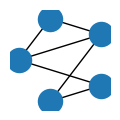

In [16]:
# Dibujar grafo
plt.figure(figsize = (1, 1))
nx.draw_shell(G)

In [32]:
# Dibujemos los 5 nodos ahora con una posición específica dentro de un plano XY
G.add_nodes_from([('A', {'pos': [3, 3]}),
                  ('B', {'pos': [2, -5]}),
                  ('C', {'pos': [5, 2]}),
                  ('D', {'pos': [-1, 2]}),
                  ('E', {'pos': [4, -5]})])

In [33]:
# Definamos las aristas y sus pesos
G.add_edges_from([('D', 'A', {'weight': 1.3}),
                  ('A', 'C', {'weight': 3.9}),
                  ('D', 'E', {'weight': 0.8}),
                  ('B', 'C', {'weight': 0.6}),
                  ('A', 'E', {'weight': 2.2}),
                  ('D', 'B', {'weight': 3.4})])

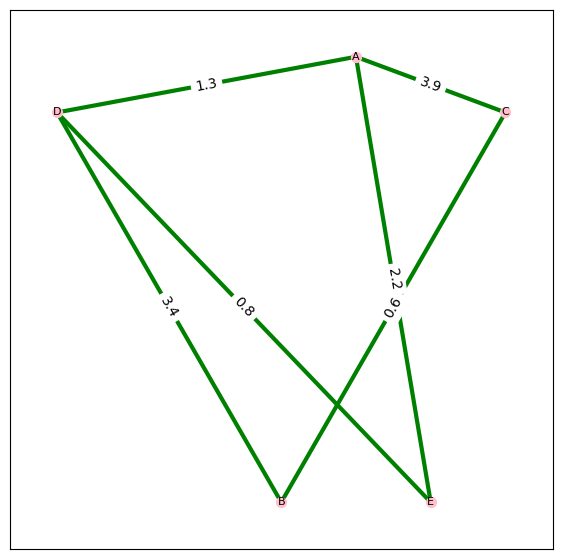

In [58]:
plt.figure(figsize = (7, 7))
# Añadimos las posiciones a los nodos
positions = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, pos = positions, node_size = 50, font_size = 8, width = 3, node_color = 'pink', edge_color = 'green')
# Añadimos el peso a las aristas
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos = positions, edge_labels = weights);

In [60]:
nx.to_pandas_edgelist(G) # Tipo de dato: DataFrame

,source,target,weight
0,A,D,1.3
1,A,C,3.9
2,A,E,2.2
3,B,C,0.6
4,B,D,3.4
5,D,E,0.8


In [61]:
list(G.adjacency())

[('A', {'D': {'weight': 1.3}, 'C': {'weight': 3.9}, 'E': {'weight': 2.2}}),
 ('B', {'C': {'weight': 0.6}, 'D': {'weight': 3.4}}),
 ('C', {'A': {'weight': 3.9}, 'B': {'weight': 0.6}}),
 ('D', {'A': {'weight': 1.3}, 'E': {'weight': 0.8}, 'B': {'weight': 3.4}}),
 ('E', {'D': {'weight': 0.8}, 'A': {'weight': 2.2}})]

In [64]:
adjacency = nx.to_pandas_adjacency(G)
adjacency

,A,B,C,D,E
A,0.0,0.0,3.9,1.3,2.2
B,0.0,0.0,0.6,3.4,0.0
C,3.9,0.6,0.0,0.0,0.0
D,1.3,3.4,0.0,0.0,0.8
E,2.2,0.0,0.0,0.8,0.0


In [65]:
adjacency.to_csv('adjacency_ej.csv') # Se genera el archivo y se guarda exactamente en la carpeta donde nos encontramos

In [70]:
df = pd.read_csv('adjacency_ej.csv')
df.set_index('Unnamed: 0', drop = True, inplace = True)
newG = nx.from_pandas_adjacency(df)

,A,B,C,D,E
Unnamed: 0,,,,,
A,0.0,0.0,3.9,1.3,2.2
B,0.0,0.0,0.6,3.4,0.0
C,3.9,0.6,0.0,0.0,0.0
D,1.3,3.4,0.0,0.0,0.8
E,2.2,0.0,0.0,0.8,0.0


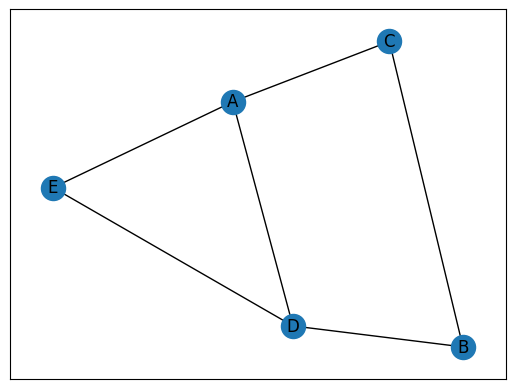

In [71]:
nx.draw_networkx(newG)

In [72]:
# Tarea 6-oct: crear un grafo bidireccional con las dos columnas de la primera hoja y plotear grafo.